In [4]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Read in Data
data_df = pd.read_csv(
    "resources/Data.csv", dtype="object", encoding="utf-8")
data_df.head()


,Zip Code,Grocery Store Count,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,White,Black,Asian,White %,Black %,Asian %,Obese %,Overweight %,Overweight or Obese %,Lat,Lng
0,63118,4.0,28810.0,29880.0,19201.0,9996.0,34.696286011801455,6.626171468240194,12177.0,15464.0,1031.0,42.26657410621312,53.67580701145435,3.578618535230823,27.80%,33.90%,61.70%,38.5950619,-90.2291565
1,63108,4.0,21345.0,39162.0,37387.0,5799.0,27.167955024595923,4.928554696650269,11550.0,7684.0,2156.0,54.111033028812365,35.999063012415085,10.100726165378308,16.90%,31.20%,48.10%,38.647459,-90.25730999999999
2,63116,3.0,44175.0,41273.0,24673.0,9304.0,21.06168647425014,4.5319750990379175,30977.0,9475.0,3756.0,70.12337294850029,21.44878324844369,8.502546689303905,25.20%,33.90%,59.00%,38.5844866,-90.266699
3,63104,3.0,20320.0,47816.0,32508.0,5150.0,25.344488188976378,4.409448818897638,10432.0,9616.0,354.0,51.338582677165356,47.32283464566929,1.7421259842519685,22.20%,35.20%,57.40%,38.6160491,-90.2291565
4,63130,2.0,29488.0,63382.0,42794.0,4433.0,15.033233857840477,4.0864080303852415,16619.0,11621.0,1561.0,56.35851871947911,39.40925122083559,5.293678784590342,12.30%,29.10%,41.40%,38.6682669,-90.32308069999999


In [6]:
#Clean up DataFrame
data_df = data_df.fillna(0)
data_df["Obese %"]=data_df["Obese %"].str.replace("%","")
data_df = data_df.apply(pd.to_numeric, errors = 'ignore')
data_df.head()


,Zip Code,Grocery Store Count,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,White,Black,Asian,White %,Black %,Asian %,Obese %,Overweight %,Overweight or Obese %,Lat,Lng
0,63118,4.0,28810.0,29880.0,19201.0,9996.0,34.696286,6.626171,12177.0,15464.0,1031.0,42.266574,53.675807,3.578619,27.8,33.90%,61.70%,38.595062,-90.229156
1,63108,4.0,21345.0,39162.0,37387.0,5799.0,27.167955,4.928555,11550.0,7684.0,2156.0,54.111033,35.999063,10.100726,16.9,31.20%,48.10%,38.647459,-90.257310
2,63116,3.0,44175.0,41273.0,24673.0,9304.0,21.061686,4.531975,30977.0,9475.0,3756.0,70.123373,21.448783,8.502547,25.2,33.90%,59.00%,38.584487,-90.266699
3,63104,3.0,20320.0,47816.0,32508.0,5150.0,25.344488,4.409449,10432.0,9616.0,354.0,51.338583,47.322835,1.742126,22.2,35.20%,57.40%,38.616049,-90.229156
4,63130,2.0,29488.0,63382.0,42794.0,4433.0,15.033234,4.086408,16619.0,11621.0,1561.0,56.358519,39.409251,5.293679,12.3,29.10%,41.40%,38.668267,-90.323081


# Obesity Rate vs. Number of Grocery Stores

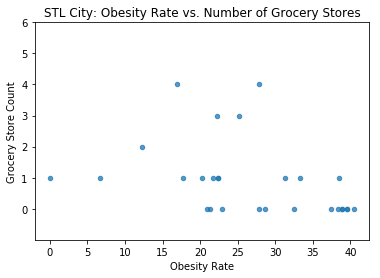

In [7]:
#Scatter Num Grocery and Obesity Rate
data_df.plot.scatter(x="Obese %", y= "Grocery Store Count", alpha = 0.75)
plt.title('STL City: Obesity Rate vs. Number of Grocery Stores')
plt.xlabel('Obesity Rate')
plt.ylabel('Grocery Store Count')
plt.ylim(-1,4)
plt.yticks([0,1,2,3,4,5,6])
plt.savefig ("Grocery_Obesity_Scatter")

In [8]:
#Find Pearson Corr Coeff Between Obesity Rate and Number of Grocery Stores
corrgo_data_df = data_df[['Grocery Store Count', 'Obese %']]
corr_go = corrgo_data_df.corr(method = 'pearson')
corr_go

,Grocery Store Count,Obese %
Grocery Store Count,1.000000,-0.382856
Obese %,-0.382856,1.000000


# Number of Grocery Stores vs. Household Income

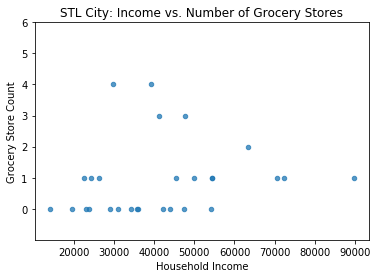

In [9]:
#Scatter Num Grocery and Household Income 
data_df.plot.scatter(x= 'Household Income', y='Grocery Store Count', alpha = 0.75)
plt.title('STL City: Income vs. Number of Grocery Stores')
plt.xlabel('Household Income')
plt.ylabel('Grocery Store Count')
plt.ylim(-1,4)
plt.yticks([0,1,2,3,4,5,6])
plt.savefig ("Income_Grocery_Scatter")

In [10]:
#Find Pearson Corr Coeff Between Household Income and Number of Grocery Stores
corrig_data_df = data_df[['Grocery Store Count', 'Household Income']]
corr_ig = corrig_data_df.corr(method = 'pearson')
corr_ig

,Grocery Store Count,Household Income
Grocery Store Count,1.000000,0.166412
Household Income,0.166412,1.000000


# Number of Grocery Stores per Zip Code

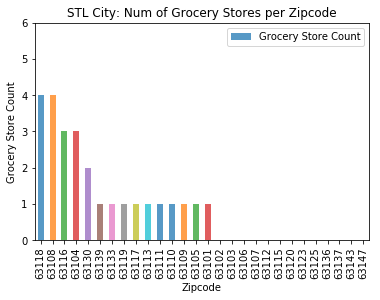

In [11]:
#Make bar Graph for zip code and num grocery stores 
data_df.plot.bar(x= 'Zip Code', y ='Grocery Store Count', alpha = 0.75)
plt.title('STL City: Num of Grocery Stores per Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Grocery Store Count')
plt.yticks([0,1,2,3,4,5,6])
plt.savefig ("Grocery_Zip_Bar")

# Percentage of White Identifying Population per Zip Code vs. Number of Grocery Stores

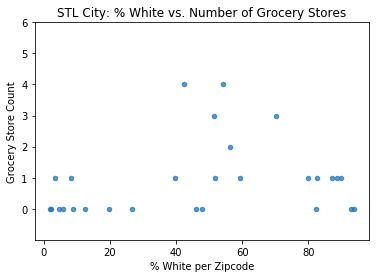

In [12]:
#Scatterplot comparing %White to Number of Grocery Stores
data_df.plot.scatter(x= 'White %', y='Grocery Store Count', alpha = 0.75)
plt.title('STL City: % White vs. Number of Grocery Stores')
plt.xlabel('% White per Zipcode')
plt.ylabel('Grocery Store Count')
plt.ylim(-1,4)
plt.yticks([0,1,2,3,4,5,6])
plt.savefig ("Race_Grocery_Scatter")

In [13]:
#Pearson Corr Coeff for %White and Num Grocery Stores 
corrwg_data_df = data_df[['Grocery Store Count', 'White %']]
corr_wg = corrwg_data_df.corr(method = 'pearson')
corr_wg

,Grocery Store Count,White %
Grocery Store Count,1.000000,0.221551
White %,0.221551,1.000000
